In [1]:
# Author: Brent Artuch
# 2024/09/15

from sympy import *
from sympy.physics.quantum import *
from math import degrees
from IPython.display import *
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["text.usetex"] = True

## Complex Numbers 
Complex Numbers =  $\mathbb{C}$ <br>
Expressed as $a+bi$ st $a,b \in \mathbb{R}$ and $i=\sqrt{-1}$ <br>
Complex Conjugate: $(a+bi)^*$ = $a-bi$ <br>
Sqaured Magnitude: $|a+bi|^2$ = $(a+bi)^*(a+bi)$ = $a^2 +b^2$ <br>

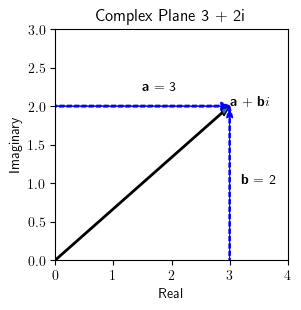

In [2]:
a, b = symbols('a b')
init_printing()

# Expressed as:
z = a + b*I
# st a,b in R, and i is an indeterminate with:
i_squared = I**2

# Complex Conjugate: 
z_conjugate = a + (-1)*b*I

# Squared Magnitude |a + bi|^2: 
z_squared_magnitude = expand(z * z_conjugate)

# Example
a_1, b_1 = 3, 2
complex_number = a_1 + b_1*I
conjugate_example = conjugate(complex_number)
squared_magnitude_example = expand(complex_number * conjugate_example)
 
# Plot the example 
plt.figure(figsize=(3,3))
plt.title("Complex Plane 3 + 2i")
plt.annotate(r'\textbf{a} + \textbf{b}$i$', xy=(3, 2))
plt.annotate(r'\textbf{a} = 3', xy=(1.5, 2.2))
plt.annotate(r'\textbf{b} = 2', xy=(3.2, 1))
plt.arrow(0,0, a_1, b_1, head_width = 0.1, length_includes_head = True, width = 0.02) 
plt.arrow(3, 0, 0, b_1, head_width = 0.1, length_includes_head = True, width = 0.02, color = 'b', linestyle = '--')
plt.arrow(0, 2, a_1, 0, head_width = 0.1, length_includes_head = True, width = 0.02, color = 'b', linestyle = '--')
plt.xlim(0,4)
plt.ylim(0,3)
plt.ylabel('Imaginary') 
plt.xlabel('Real') 
plt.show() 

(z, i_squared, z_conjugate, z_squared_magnitude, conjugate_example, squared_magnitude_example)

## Polar Form
Let $z$ = $a+bi$ <br>
$r$ = $||z||$ = $\sqrt{a^2+b^2}$ <br>
If $b$ = $0$, then $z$ = $||a||$ <br>
The phase $\varphi$ is called the argument. <br>
$(r, \varphi)$ represents a point in the complex plane. <br>
$z$ = $r(\cos\varphi + i \sin\varphi)$ = $re^{i\varphi}$ <br>

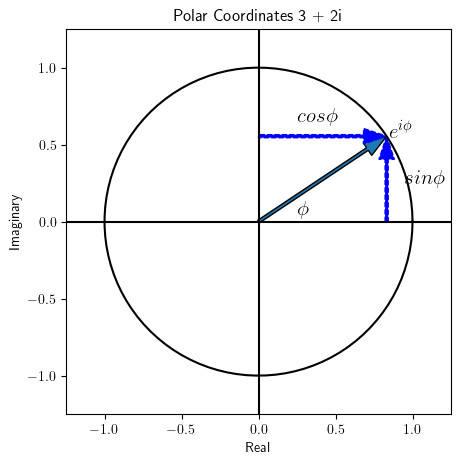

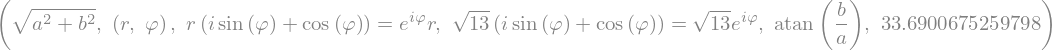

In [3]:
phi, r, e = symbols('varphi, r, e')
# Calculate magnitude r using the Norm Sqaure or Pythagorean Theorem:
r_calculated = sqrt(z_squared_magnitude)
# Note: if b = 0, then r = ||a||

# The phase phi is called the argument
polar_coordinates = (r, phi)
z_polar_form = Eq(r*(cos(phi) + I*sin(phi)), r*e**(I*phi))

# Example 
r_example = sqrt(squared_magnitude_example)
z_polar_form_example = Eq(r_example*(cos(phi) + I*sin(phi)), r_example*e**(I*phi))

# Side Note: Calculating the angle phi
phi_calculated = atan(b/a)

# Example Continued
rads_phi_example = np.atan(b_1/a_1)
phi_example = degrees(rads_phi_example)
sin_phi = np.sin(rads_phi_example)
cos_phi = np.cos(rads_phi_example)

# Plot 
radius = 1
angles = np.linspace(0 * np.pi, 2 * np.pi, 100) 
xs = np.cos(angles)
ys = np.sin(angles)

plt.figure(figsize=(5,5))
plt.title("Polar Coordinates 3 + 2i")
plt.annotate(r'$e^{i \phi}$', xy=(0.85, 0.55), fontsize = 15)
plt.annotate(r'$cos \phi$', xy=(0.25, 0.65), fontsize = 15)
plt.annotate(r'$sin \phi$', xy=(0.95, 0.25), fontsize = 15)
plt.annotate(r'$\phi$', xy=(0.25, 0.05), fontsize = 15)
plt.plot(xs, ys, color = 'black')
plt.xlim(-radius-0.25, radius+0.25)
plt.ylim(-radius-0.25, radius+0.25)
plt.ylabel('Imaginary') 
plt.xlabel('Real') 
plt.gca().set_aspect('equal')
plt.plot([radius+0.25, -radius-0.25], [0, 0], color = 'black')
plt.plot([0, 0], [radius+0.25, -radius-0.25], color = 'black')
plt.arrow(0, 0, cos_phi, sin_phi,  head_width = 0.1, length_includes_head = True, width = 0.02)
plt.arrow(cos_phi, 0, 0, sin_phi, head_width = 0.1, length_includes_head = True, width = 0.02, color = 'b', linestyle = '--')
plt.arrow(0, sin_phi, cos_phi, 0, head_width = 0.1, length_includes_head = True, width = 0.02, color = 'b', linestyle = '--')

plt.show()

(r_calculated, polar_coordinates, z_polar_form, z_polar_form_example, phi_calculated, phi_example)

## Unit of Information

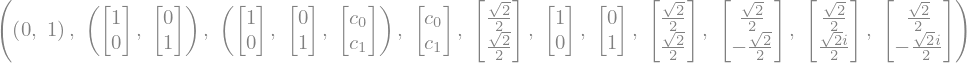

In [4]:
# Classical Bit 
c_bits = (0, 1)
c_bit_vectors = (Matrix([[1], [0]]), Matrix([[0], [1]])) 

# Quantum Qubit
c_0, c_1 = symbols("c_0, c_1")
qubits = (Matrix([[1], [0]]), Matrix([[0], [1]]), Matrix([[c_0], [c_1]])) 
# with |c_0|^2 + |c_1|^2 = 1, and |c_n|^2 is the probability of yielding state n

# A qubit is a linear combination of basis states:
q = c_0*qubits[0] + c_1*qubits[1]
# st that c_0 and c_1 are complex in two dimensions 

# Example
c_0e, c_1e = 1/sqrt(2), 1/sqrt(2)
example_state = Matrix([[c_0e], [c_1e]])
# when measured, yields 0 50% of the time and 1 50% of the time
# Note: this is also the ket plus state and is a state of equal superposition

# Side Note: Defining common states
ket_0 = qubits[0]
ket_1 = qubits[1]
ket_plus = 1/sqrt(2)*(ket_0 + ket_1)
ket_minus = 1/sqrt(2)*(ket_0 - ket_1)
ket_i = 1/sqrt(2)*(ket_0 + I*ket_1)
ket_minus_i = 1/sqrt(2)*(ket_0 - I*ket_1)

(c_bits, c_bit_vectors, qubits, q, example_state, ket_0, ket_1, ket_plus, ket_minus, ket_i, ket_minus_i)

## Storing More Information: Mulitiple Qubits

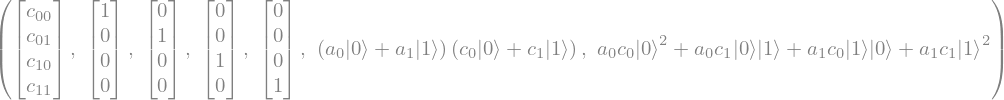

In [5]:
# Two Qubits
c_00, c_01, c_10, c_11 = symbols("c_00, c_01, c_10, c_11")
q_12 = Matrix([[c_00], [c_01], [c_10], [c_11]])
# st |c_OO|^2 + |c_01|^2 + |c_10|^2+ |c_11|^2 = 1, and |c_n|^2 is the probability of yielding state n

# Defining two qubit states Ket 00, ket 01, ket 10, and ket 11 using the tensor product
ket_00 = TensorProduct(ket_0, ket_0)
ket_01 = TensorProduct(ket_0, ket_1)
ket_10 = TensorProduct(ket_1, ket_0)
ket_11 = TensorProduct(ket_1, ket_1)

# A tensor product state:
a_0, a_1 = symbols("a_0, a_1")
ket_zero, ket_one = Ket("0"), Ket("1")
product_state = (a_0*ket_zero + a_1*ket_one) * (c_0*ket_zero + c_1*ket_one)
expanded_product_state = expand(product_state)

(q_12, ket_00, ket_01, ket_10, ket_11, product_state, expanded_product_state)

## Reading Out More Information: Mulitiple Qubits
Consider the 2-Qubit system: $q_{1,2}$ = $c_{00}\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}+c_{01}\begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}+c_{10}\begin{bmatrix} 0 \\ 0 \\ 1 \\ 0 \end{bmatrix}+c_{11}\begin{bmatrix} 0 \\ 0 \\ 0 \\ 1 \end{bmatrix}$ <br>
st $|c_{00}|^2+|c_{01}|^2+|c_{10}|^2+|c_{11}|^2=1$ <br>
Measure the first qubit to be zero with probability $|c_{00}|^2+|c_{01}|^2$ and post measurement state: <br>
$q_1$ = $\frac{1}{\sqrt{|c_{00}|^2+|c_{01}|^2}} \left(c_{00}\begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}+c_{01}\begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix} \right)$

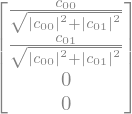

In [6]:
# Measure first qubit to be 0 from q_12
q1 = (1/sqrt((abs(c_00))**2 + (abs(c_01))**2)) * (c_00*ket_00 + c_01*ket_01)
# Note: The absolute value function is used simply to represent the norm for this case because their is no norm representation in sympy as far as I could find.

(q1)

## Dirac Notation

In [7]:
# Ket notation (column vectors)
display(
    Latex(f"$\ket{0}$ = $\\begin{{bmatrix}} 1 \\\ 0 \\end{{bmatrix}}$"),
    Latex(f"$\ket{1}$ = $\\begin{{bmatrix}} 0 \\\ 1 \\end{{bmatrix}}$"),
    Latex(f"$\ket{{q}}$ = $\\begin{{bmatrix}} c_0 \\\ c_1 \\end{{bmatrix}}$ = $c_0\ket{0} + c_1\ket{1}$")
)
# bra notation (conjugate row vectors)
display(
    Latex(f"$\Bra{0}$ = $\\begin{{bmatrix}} 1 & 0 \\end{{bmatrix}}$"),
    Latex(f"$\Bra{1}$ = $\\begin{{bmatrix}} 0 & 1 \\end{{bmatrix}}$"),
    Latex(f"$\Bra{{q}}$ = $\\begin{{bmatrix}} c_0^* & c_1^* \\end{{bmatrix}}$ = $c_0^*\Bra{0} + c_1^*\Bra{1}$")
)

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Braket / Inner Product 

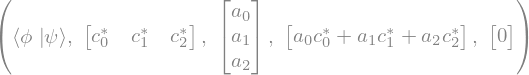

In [8]:
# Notation
a_2 = symbols("a_2")
c_Oconj, c_1conj, c_2conj = symbols("c_0^* c_1^* c_2^*")
bra_phi = Bra("phi")
ket_psi = Ket("psi")
braket_phipsi = bra_phi * ket_psi

# Inner Product
bra_vector = transpose(Matrix([[c_Oconj],[c_1conj],[c_2conj]]))
ket_vector = Matrix([[a_0],[a_1],[a_2]])

inner_product = bra_vector * ket_vector
# Results in a single scalar value

# Example 
braket_bra0_ket1 = Dagger(ket_0) * ket_1 
# Note: Dagger is the conjugate transpose of ket_0 giving us bra_0

(braket_phipsi, bra_vector, ket_vector, inner_product, braket_bra0_ket1)

## Orthonormality

In [9]:
# Inner Product of a state with itself
self_inner_product = Dagger(ket_0) * ket_0
# The result is the total probability of 1, and that the state is normalized.

# Inner product of basis states
# Ket 0 and Ket 1
inner_product_z_basis = Dagger(ket_0) * ket_1 
# Ket + and Ket -
inner_product_x_basis = Dagger(ket_plus) * ket_minus 
# Ket i and Ket -i
inner_product_y_basis = Dagger(ket_i) * ket_minus_i
# The result is 0, and therefore the basis states are orthogonal to their counterparts.
# Since the basis states are normalized and orthogonal, they can be classified as orthonormal. 

(self_inner_product, inner_product_z_basis, inner_product_x_basis, inner_product_y_basis)

## Entanglement 

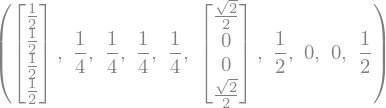

In [10]:
# Consider the unentangeled states:
psi_a = (1/sqrt(2))*(ket_0 + ket_1)
psi_b = (1/sqrt(2))*(ket_0 + ket_1)

# Take their tensor product 
psi_ab = TensorProduct(psi_a, psi_b)
# Factor the coefficient for each state in the vector and take norm square
probability_00 = psi_ab[0] * conjugate(psi_ab[0])
probability_01 = psi_ab[1] * conjugate(psi_ab[1])
probability_10 = psi_ab[2] * conjugate(psi_ab[2])
probability_11 = psi_ab[3] * conjugate(psi_ab[3])
# These states can be factored into a product state since they all have some probability of occuring

# Let's say we have an entangled state
entangled_psi_ab = (1/sqrt(2))*ket_00 + (1/sqrt(2))*ket_11
# Factor the coefficient for each state in the vector and take norm square
entangled_probability_00 = entangled_psi_ab[0] * conjugate(entangled_psi_ab[0])
entangled_probability_01 = entangled_psi_ab[1] * conjugate(entangled_psi_ab[1])
entangled_probability_10 = entangled_psi_ab[2] * conjugate(entangled_psi_ab[2])
entangled_probability_11 = entangled_psi_ab[3] * conjugate(entangled_psi_ab[3])
# Now we only have the possibility of the 00 and 11 states and the entangled state cannot be factored into a product state

(psi_ab, probability_00, probability_01, probability_10, probability_11, entangled_psi_ab, entangled_probability_00,
 entangled_probability_01, entangled_probability_10, entangled_probability_11)